# Modeling

In this notebook we will be using survival analysis to predict weather a candidate will survive or lose the primary. What we aim to achieve is to see if there is a threshold of money raised or a threshold of money spent on various expenses that a candidate needs to survive the primaries and have a shot at becoming a presidential candidate from either of the two parties.To do this we will be using the survival analysis package `lifelines` to handle some of these tasks. To gain a snap shot of the likely hood of a drop out we will be using a `Kaplan Meier Fitter` to look at the chance that a candidate will drop out as compared to the rest of the field.    For the predicting the 2020 democratic primary winner  we will be using the `WeibullAFTFitter` to answer this. 

- [Imports](#import)
- [Reading In The Data](#reading)
    - [2008 Cycle](#2008)
    - [2012 Cycle](#2012)
    - [2016 Cycle](#2016)
    - [2020 Cycle](#2020)
- [Modeling](#Modeling)
    - [Survival Analysis 2008](#SA_2008)
    - [Survival Analysis 2012](#SA_2012)
    - [Survival Analysis 2012](#SA_2016)
    - [Survival Analysis 2020](#SA_2020)

### Imports
<a id="import"></a>

In [533]:
import numpy                     as np
import seaborn                   as sns
import pandas                    as pd
import lifelines                 as life
import matplotlib.ticker         as mtick
from   matplotlib  import pyplot as plt 
from   lifelines   import KaplanMeierFitter,WeibullAFTFitter
from   datetime    import date, datetime

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Reading in the data
<a id="reading"></a>

#### 2008 Cycle
<a id="2008"></a>

In [534]:

df_2008_model_REP = pd.read_csv('../../Data/Model/2008_modeling_GOP.csv')
df_2008_model_DM = pd.read_csv('../../Data/Model/2008_modeling_DCCC.csv')

#### 2012 Cycle
<a id="2012"></a>

In [535]:
df_2012_model_REP = pd.read_csv('../../Data/Model/2012_modeling_GOP.csv')

#### 2016 Cycle
<a id="2016"></a>

In [536]:
df_2016_model_REP = pd.read_csv('../../Data/Model/2016_modeling_GOP.csv')
df_2016_model_DM = pd.read_csv('../../Data/Model/2016_modeling_DCCC.csv')

#### 2020 Cycle
<a id="2020"></a>

In [457]:
df_2020_model_DM = pd.read_csv('../../Data/Model/2020_modeling_DCCC.csv')

### Modeling 
<a id="Modeling"></a>

#### Survival Analysis Model: 2008
<a id="SA_2008"></a>

In [464]:
# drop rows form that are not needed by our model or are uninterperatable. 
df_rep_2008 = df_2008_model_REP.drop(columns=['Unnamed: 0','Candidate'])
df_dm_2008 = df_2008_model_DM.drop(columns=['Unnamed: 0','Candidate'])

In [577]:
df_2008_all_cand = pd.concat([df_gop_2008,df_dccc_2008])

In [467]:
df_2008_all_cand.reset_index(inplace = True)
df_2008_all_cand.drop(columns='index',inplace =True)

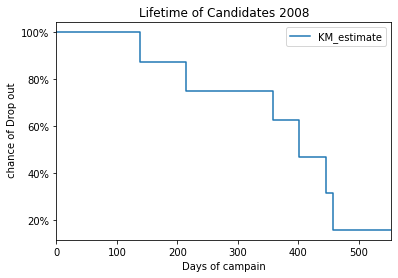

In [660]:
# gives us a percentage chance that any candidate will drop out at that point in time 
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(df_gop_2008['Days_in_race'], df_gop_2008['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2008')
plt.ylabel(' chance of Drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of campain');

#### Observations:
From this graphic we can see the likely hood that any candidate from the 2008 Republican Primaries will drop out on that day. 

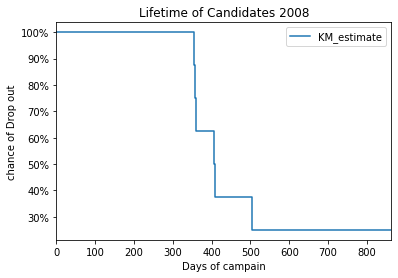

In [661]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(df_dccc_2008['Days_in_race'], df_dccc_2008['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2008')
plt.ylabel('chance of Drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of campain');


#### Observations:
From this graphic we can see the likely hood that any candidate from the 2008 Democratic Primaries will drop out on that day. 

In [342]:
wft = WeibullAFTFitter()
wft.fit(df_2008_all_cand, 'Days_in_race', event_col='Dropped_out',show_progress= True)
wft.score_

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.837625689817491
            Iterations: 45
            Function evaluations: 50
            Gradient evaluations: 45
     fun: 4.837625689817491
     jac: array([-6.96756408e-06, -4.70798651e-06, -5.86792597e-06, -5.66502352e-06,
       -2.93743707e-06, -7.51530740e-07, -4.40785120e-07,  1.43515828e-06,
       -2.15286989e-07])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 45
    njev: 45
  status: 0
 success: True
       x: array([  0.34078093,   0.53013109,  -2.18379092,   0.61388585,
         0.38454255, -16.53278374,  30.69164517,   6.32520309,
         1.09304802])


0.719626168224299

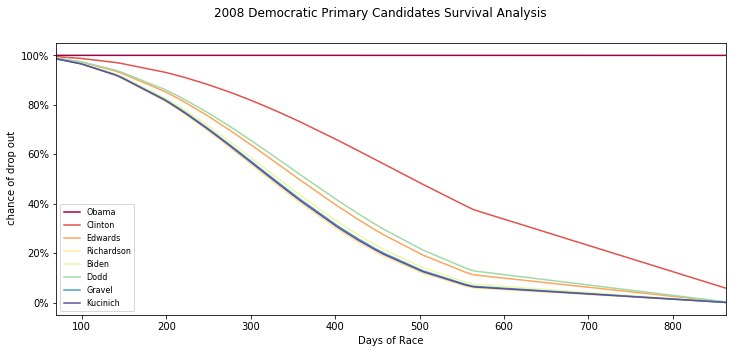

In [657]:
ax = wft.predict_survival_function(df_dccc_2008).plot(figsize=(12,5),cmap = "Spectral")
plt.suptitle('2008 Democratic Primary Candidates Survival Analysis', fontsize=12)
plt.ylabel(' chance of drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of Race')
plt.legend(['Obama','Clinton','Edwards','Richardson',
            'Biden','Dodd','Gravel','Kucinich'],loc=3, prop={'size': 8});

#### Observations:
From this image we see above our model predicts the likely hood that the individual candidate will drop out over time. We see a horizontal line for Obama because our model although correctly predicting that he would make it through to the primaries it predicts his death date many thousands of years later. This is due to a few factors but the major one being that he raised a considerable amount of money and was always increasing his quarter over quarter donations. The other candidates were predicted with more accurate results so we can assume that he was an out lier candidate. 

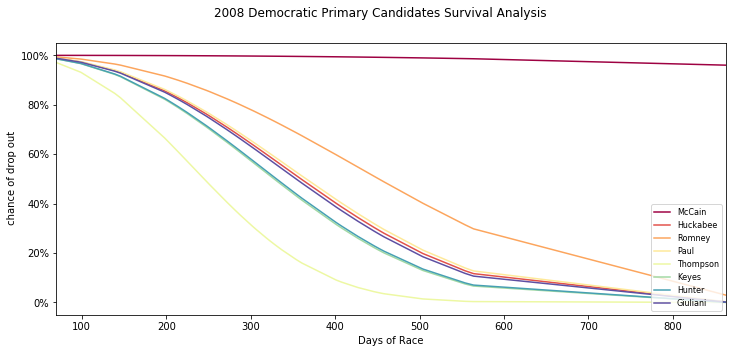

In [656]:
ax =wft.predict_survival_function(df_gop_2008).plot(figsize=(12,5),cmap = "Spectral")
plt.suptitle('2008 Democratic Primary Candidates Survival Analysis', fontsize=12)
plt.ylabel(' chance of drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of Race')
plt.legend(['McCain','Huckabee','Romney','Paul',
            'Thompson','Keyes','Hunter','Giuliani'],loc=4, prop={'size': 8});

#### Observations:
From this graph we can see our model predicting Huckabee to be the best candidate to survive and then followed by the actual winner McCain. Our model predicts that both will survive through the primaries and be up for a nomination. This shows that it is not just about raising the most money you must also deliver in other ways for the primaries. 

In [470]:
df_2008_predictions_dccc = wft.predict_expectation(df_dccc_2008)
df_2008_predictions_gop = wft.predict_expectation(df_gop_2008)

In [537]:
df_2008_predictions_dccc['Predicted_Days_survived'] = df_2008_predictions_dccc[0]
df_2008_predictions_dccc.drop(columns=[0],inplace = True)
df_2008_predictions_gop['Predicted_Days_survived'] = df_2008_predictions_gop[0]
df_2008_predictions_gop.drop(columns=[0],inplace = True)
df_2008_predictions_dccc['Names']= ['Obama','Clinton','Edwards','Richardson',
                                    'Biden','Dodd','Gravel','Kucinich']
df_2008_predictions_gop['Names']= ['McCain','Huckabee','Romney','Paul',
                                    'Thompson','Keyes','Hunter','Giuliani']

In [542]:
df_2008_predictions_dccc.sort_values(by = 'Predicted_Days_survived',ascending=False,inplace =True)
df_2008_predictions_gop.sort_values(by = 'Predicted_Days_survived',ascending=False,inplace =True)

In [543]:
df_2008_predictions_dccc

,Predicted_Days_survived,Names
0,103621.41376,Obama
1,2275.61786,Clinton
2,322.63838,Edwards
3,266.35686,Richardson
5,251.17846,Dodd
7,219.13209,Kucinich
4,218.94243,Biden
6,216.50045,Gravel


In [544]:
df_2008_predictions_gop

,Predicted_Days_survived,Names
0,2738.34030,McCain
2,600.77776,Romney
7,459.36059,Giuliani
3,268.26842,Paul
1,253.76011,Huckabee
4,230.92855,Thompson
6,219.58684,Hunter
5,216.27822,Keyes


The predicted days survived refers to the number of days the candidate is expected to survive before there is at least a 50% chance of them dropping out. The candidate we would expect to see drop out first for the democrats: Dodd, Kucinich, Biden and Gravel and for the republicans: Huckabee, Thompson, Hunter and Keyes. Which gives a similar result as to who dropped out for the actual campaign. 

#### Survival Analysis Model: 2012
<a id="SA_2012"></a>


In [619]:
# read in the data
df_gop_2012 = df_2012_model_GOP.drop(columns=['Unnamed: 0','Candidate'])

Due to the small field we will add in some candidates from the past years candidates to simulate a larger field of serious candidates

In [620]:
# create a large data frame of candidates
df_gop_2012_mod = pd.concat([df_gop_2012,df_gop_2008],sort = True)
# reset index
df_gop_2012_mod.reset_index(inplace = True)
df_gop_2012_mod.drop(columns=['index'],inplace = True)

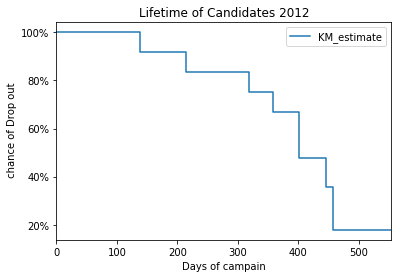

In [655]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(df_gop_2012_mod['Days_in_race'], df_gop_2012_mod['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2012')
plt.ylabel(' chance of Drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of campain');

In [622]:
# instansiate our model
wft = WeibullAFTFitter()
# fit our model 
wft.fit(df_gop_2012_mod, 'Days_in_race', event_col='Dropped_out',show_progress= True)
# score our model
wft.score_

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4380174670729313
            Iterations: 58
            Function evaluations: 72
            Gradient evaluations: 58
     fun: 3.4380174670729313
     jac: array([ 1.64484546e-06,  1.07835872e-06,  2.43698447e-06,  1.31164191e-08,
        3.10742562e-06,  1.69480708e-09,  1.95811320e-06,  5.71892197e-06,
       -7.98429008e-07])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 58
    njev: 58
  status: 0
 success: True
       x: array([ 9.84674249e+00,  5.22862741e-02, -1.04480833e+01, -6.54398987e+00,
        2.74795580e+00,  3.94904109e+02,  2.73235733e-02,  5.77335346e+00,
        2.48885644e+00])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9433962264150944

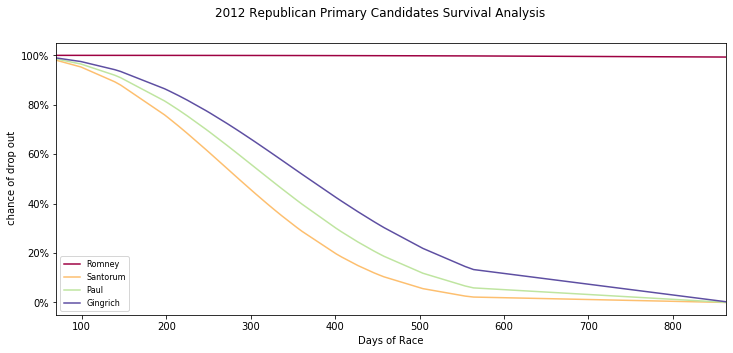

In [653]:
# Plotting the predicded survival sunctions for the Republicnas in 2012
ax = wft.predict_survival_function(df_gop_2012).plot(figsize=(12,5),cmap = "Spectral")
plt.suptitle('2012 Republican Primary Candidates Survival Analysis', fontsize=12)
plt.ylabel(' chance of drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of Race')
plt.legend(['Romney','Santorum','Paul','Gingrich'],loc=3, prop={'size': 8});

#### Observations:
We can clearly see Romney out preform his opponents and after looking at his total donations we can see that he earns almost 4 times the amount Santorum does. We see a similar shape to the obama 2008 curve from the past sections although our prediction range is more realistic with what we would expect for a candidate 

In [624]:
df_2012_predictions_gop = wft.predict_expectation(df_gop_2012)

In [625]:
df_2012_predictions_gop['Predicted_Days_survived'] = df_2012_predictions_gop[0]
df_2012_predictions_gop.drop(columns=[0],inplace = True)
df_2012_predictions_gop['Names']= ['Rommney','Santorum',"Paul",'Gingrich']


In [626]:
df_2012_predictions_gop

,Predicted_Days_survived,Names
0,inf,Rommney
1,309.58388,Santorum
2,443.01313,Paul
3,393.08595,Gingrich


The model predicts that Rommney will not see a death event in his life time this is a similar case to what we saw with obama in the 2008 election

####  Survival Analysis Model: 2016
<a id="SA_2016"></a>

In [632]:
# read in our data
df_gop = df_2016_model_GOP.drop(columns=['Unnamed: 0','Candidate'])
df_dccc = df_2016_model_DCCC.drop(columns=['Unnamed: 0','Candidate'])

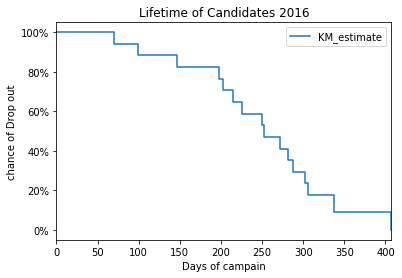

In [651]:
# instanciate our model 
kmf = KaplanMeierFitter()

ax = plt.subplot()
# fit our model 
kmf.fit(df_gop['Days_in_race'], df_gop['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2016')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('chance of Drop out')
plt.xlabel('Days of campain');


#### Observations
From the above plot of the `Kaplan Meier Estimator` above we can see an average chance of our population of candidates from the 2016 election dropping out after X number of days. As you would expect if you were launching an presidential campaign you would make sure you have funds ready to last at least 100 days and we can see that most have this mind set in place. However this is not always the case. In the 2016 election we saw Rick Perry drop out at 99 days after a pore debate. As a result our model begins to dip around that point. We see another sharp drop at 200 days right around the time of primary delegates are being won and candidates are realizing they wont be able to win based on the states they have won, as a result we expect to see most of our dropouts around this time of the race. 

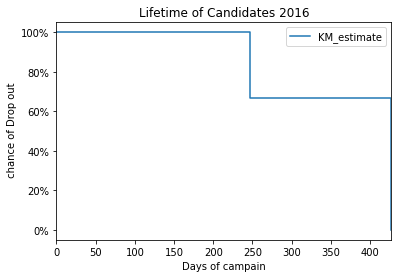

In [650]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(df_dccc['Days_in_race'], df_dccc['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2016')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel(' chance of Drop out')
plt.xlabel('Days of campain');

#### Observations
From the above plot of the `Kaplan Meier Estimator` above we can see an average chance of our population of candidates from the Democratic primaries in 2016 election dropping out after X number of days. This looks quite different from the GOP curve above. This is due to a lac of candidates. 2016 had a very small field for the election. With big names like Clinton and Sanders making little room for a large number of candidates. As a result we only see 2 Death events Sanders and OMally.

In [630]:
test_df1 = pd.concat([df_dccc,df_gop])

In [631]:
wft = WeibullAFTFitter()
wft.fit(df_gop, 'Days_in_race', event_col='Dropped_out',show_progress= True)
wft.score_

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.217633153913329
            Iterations: 25
            Function evaluations: 34
            Gradient evaluations: 25
     fun: 5.217633153913329
     jac: array([ 3.47342128e-07,  1.19641999e-06,  1.36157593e-07,  4.57746831e-06,
        6.73765131e-06,  2.47265764e-06,  3.33194359e-07,  1.20393547e-06,
       -2.50888699e-06])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([-0.20645985,  0.02805471, -0.06355101,  0.30150683, -0.35273871,
        0.64384902, -0.09013431,  5.46468751,  1.562412  ])


0.8656716417910447

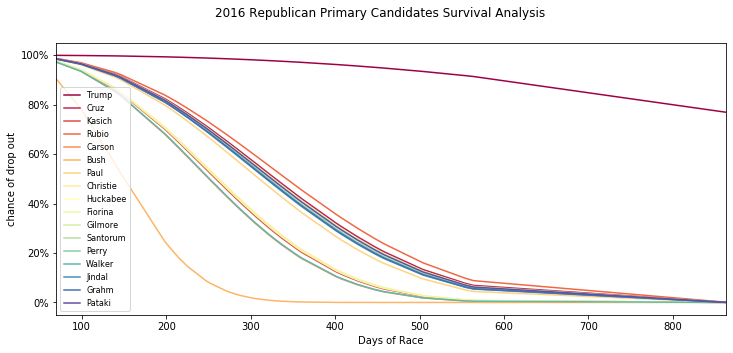

In [648]:
ax = wft.predict_survival_function(df_gop).plot(figsize=(12,5),cmap = "Spectral")
plt.suptitle('2016 Republican Primary Candidates Survival Analysis', fontsize=12)
plt.ylabel('chance of drop out')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Days of Race')
plt.legend(['Trump','Cruz','Kasich','Rubio','Carson','Bush','Paul',
            'Christie', 'Huckabee','Fiorina','Gilmore','Santorum',
            'Perry','Walker', 'Jindal', 'Grahm','Pataki'],loc=3, prop={'size': 8});

#### Observations:
From the above plot we can see the predicted drop out rates for each candidate in the 2016 election. We can see that many campaigns are predicted to make it through the Primaries and be contenders to be selected at the GOP convention. Some candidates of note are Donald Trump, Ted Cruz and Ben Carson. When we see predictions for number of days survived we see Donald Trump is estimated at 1037 days as a result we don't see his campaign dip as the others do. If we were to extend this image out by more days however we would see a similar shape as the Cruz campaign. Ted Cruz was an early favorite to get the nomination and his path reflects that. His donation base was one of the biggest during the primaries only being out spent by Donald Trump. The Final candidate of interest is Dr.Ben Carson, although receiving roughly one half of the Cruz campaign he was able to get one of the best 15_Q4 of the the whole field which elevated his scores considerably. 

Due to the lack of candidates in the 2016 Democratic primaries we will combine the data frames and then drop the republicans from the field to simulate a larger field of candidates. 

In [559]:
df_dccc_mod = pd.concat([df_dccc,df_gop])
df_dccc_mod.reset_index(inplace = True)
df_dccc_mod.drop(columns=['index'],inplace = True)

In [560]:
wft = WeibullAFTFitter()
wft.fit(df_dccc_mod, 'Days_in_race', event_col='Dropped_out',show_progress= True)
df_dccc_mod = pd.concat([df_dccc,df_gop])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lifelines/utils/__init__.py:1053: ConvergenceWarning: Column Q1_Don1 have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Dropped_out'].astype(bool)
>>> print(df.loc[events, 'Q1_Don1'].var())
>>> print(df.loc[~events, 'Q1_Don1'].var())

A very low variance means that the column Q1_Don1 completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.984702548247478
            Iterations: 26
            Function evaluations: 37
            Gradient evaluations: 26
     fun: 4.984702548247478
     jac: array([ 1.51940626e-07, -1.30701201e-06, -4.16177717e-06, -5.40259515e-06,
       -5.20871612e-06, -3.14633324e-06, -2.24282555e-07, -3.51208328e-06,
       -2.47585257e-06])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([ 0.02007885,  0.03524693, -0.06123269,  0.17846582,  0.12185958,
       -0.01916973,  0.74744715,  5.46245167,  1.59293911])


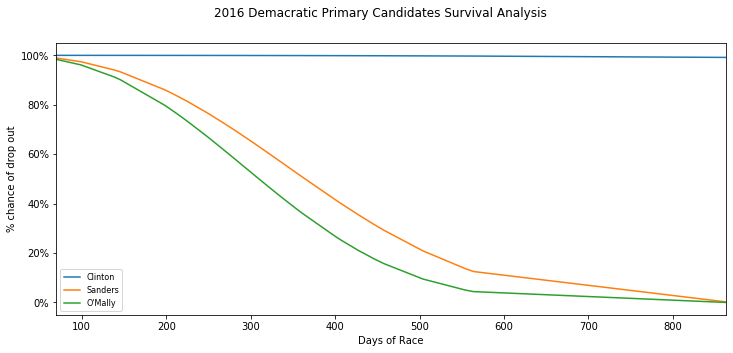

In [646]:
# plotting the loseing candidates chances of makeing it to the primaries. 
ax = wft.predict_survival_function(df_dccc).plot(figsize=(12,5))
plt.suptitle('2016 Demacratic Primary Candidates Survival Analysis', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('% chance of drop out')
plt.xlabel('Days of Race')
plt.legend(['Clinton','Sanders',"O'Mally"],loc=3, prop={'size': 8});

#### Observations:
From the above plot we can see the predicted drop out rates for each candidate in the 2016 election. We can see that many campaigns are predicted to make it through the Primaries and be contenders to be selected at the GOP convention. Some candidates of note are Donald Trump, Ted Cruz and Ben Carson. When we see predictions for number of days survived we see Donald Trump is estimated at 1037 days as a result we don't see his campaign dip as the others do. If we were to extend this image out by more days however we would see a similar shape as the Cruz campaign. Ted Cruz was an early favorite to get the nomination and his path reflects that. His donation base was one of the biggest during the primaries only being out spent by Donald Trump. The Final candidate of interest is Dr.Ben Carson, although receiving roughly one half of the Cruz campaign he was able to get one of the best 15_Q4 of the the whole field which elevated his scores considerably. 

In [562]:
df_2016_predictions_dccc = wft.predict_expectation(df_dccc)
df_2016_predictions_gop = wft.predict_expectation(df_gop)

In [563]:
df_2016_predictions_dccc['Predicted_Days_survived'] = df_2016_predictions_dccc[0]
df_2016_predictions_dccc.drop(columns=[0],inplace = True)
df_2016_predictions_gop['Predicted_Days_survived'] = df_2016_predictions_gop[0]
df_2016_predictions_gop.drop(columns=[0],inplace = True)
df_2016_predictions_dccc['Names']= ['Clinton','Sanders',"O'Mally"]
df_2016_predictions_gop['Names']= ['Trump','Cruz','Kasich','Rubio','Carson','Bush','Paul',
                                    'Christie', 'Huckabee','Fiorina','Gilmore','Santorum',
                                    'Perry','Walker', 'Jindal', 'Grahm','Pataki']

In [565]:
df_2016_predictions_dccc.sort_values(by = 'Predicted_Days_survived',ascending=False,inplace =True)
df_2016_predictions_gop.sort_values(by = 'Predicted_Days_survived',ascending=False,inplace =True)

In [566]:
# Democrats predictons
df_2016_predictions_dccc

,Predicted_Days_survived,Names
0,12923.34627,Clinton
1,397.40718,Sanders
2,220.35571,O'Mally


In [567]:
# Republicans predictons
df_2016_predictions_gop

,Predicted_Days_survived,Names
0,773.07610,Trump
1,361.30916,Cruz
3,336.42724,Rubio
4,280.88541,Carson
5,242.08035,Bush
2,238.84969,Kasich
7,226.09464,Christie
15,224.54201,Grahm
6,222.53495,Paul
9,218.96686,Fiorina


#### Survival Analysis Model: 2020 
<a id="SA_2020"></a>

In [634]:
df_2020_model_DCCC = df_2020_model_DCCC

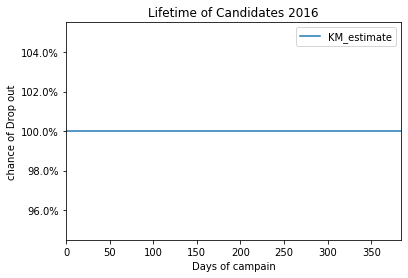

In [645]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(df_2020_model_DCCC['Days_in_race'], df_2020_model_DCCC['Dropped_out'])
ax = kmf.plot(ax=ax, ci_show=False,title = 'Lifetime of Candidates 2016')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('chance of Drop out')
plt.xlabel('Days of campain');

#### Observations: 
Because we have not observe any death events we can not use the Kaplan Meier method for this data set. But to be able to predict who would win or lose we can still use the Weibull AFTF models to make predictions based on how passed campaigns have preformed up to this point. 

In [636]:
# making a dataframe of all past democratic and republican primaries. 
df_train = pd.concat([df_gop,df_dccc,df_gop_2012_mod,df_gop_2008,df_dccc_2008],sort=True)

In [637]:
df_train.reset_index(inplace = True)

In [638]:
df_train.drop(columns='index',inplace = True)

In [639]:
wft = WeibullAFTFitter()
wft.fit(df_train, 'Days_in_race',event_col='Dropped_out',show_progress= True)
wft.score_

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.035654229159898
            Iterations: 26
            Function evaluations: 31
            Gradient evaluations: 26
     fun: 5.035654229159898
     jac: array([1.43186131e-06, 1.77295273e-06, 5.24573583e-07, 5.30150169e-07,
       1.06293074e-06, 7.29631369e-07, 8.03188011e-07, 6.77202583e-07,
       1.07912768e-07])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([ 0.21857888, -0.24200253,  0.00896375,  0.25731917, -0.46211993,
        0.90268433,  0.30172736,  5.93748194,  0.92176014])


0.7990049751243781

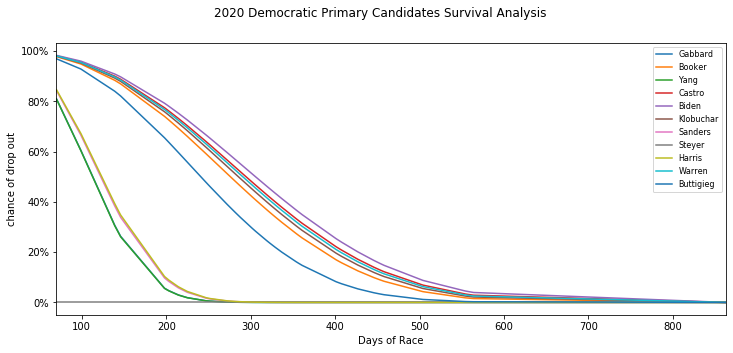

In [640]:
ax = wft.predict_survival_function(df_2020_model_DCCC).plot(figsize=(12,5))
plt.suptitle('2020 Democratic Primary Candidates Survival Analysis', fontsize=12)
plt.ylabel('chance of drop out')
plt.xlabel('Days of Race')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(['Gabbard','Booker','Yang','Castro',
            'Biden','Klobuchar','Sanders','Steyer','Harris',
            'Warren','Buttigieg'],loc=1, prop={'size': 8});

##### Observations: 
We can see from this graph that many of the candidates have grater of a 20% chance to make it through the primaries (330 days from now at the time of publishing this note book) at this point in their campaigns. The candidates that fall short are Harris, Yang, Steyer and Buttigieg. This makes some intuitive sense when we look at current polling averages for these candidates. The major reason for these low scores is that many of the quarter by quarter growth has stagnated at this point in the race, or they have gotten off to a rocky start in the early months of donations.  

In [641]:
df_2020_predictions_dccc = wft.predict_expectation(df_2020_model_DCCC)
df_2020_predictions_dccc['Predicted Days survived'] = df_2020_predictions_dccc[0]
df_2020_predictions_dccc.drop(columns=[0],inplace = True)
df_2020_predictions_dccc['Names']=['Gabbard','Booker','Yang','Castro',
            'Biden','Klobuchar','Sanders','Steyer','Harris',
            'Warren','Buttigieg']

In [642]:
df_2020_predictions_dccc.sort_values(by = 'Predicted Days survived',ascending=False,inplace =True)

In [643]:
df_2020_predictions_dccc

,Predicted Days survived,Names
4,313.96885,Biden
3,302.44614,Castro
9,298.46015,Warren
5,293.15458,Klobuchar
1,283.43453,Booker
10,247.42362,Buttigieg
8,126.80301,Harris
6,125.52745,Sanders
0,115.50112,Gabbard
2,115.22749,Yang


The predicted days survived refers to the number of days the candidate is expected to survive before there is at least a 50% chance of them dropping out.